<h1>Desafío Día del Programador</h1>

<h4>Descripcion</h4>
<br>
¡¡Feliz Día del Programad@r!! 😁
<br>Hemos encontrado en un libro antiguo una hoja que luego de procesarla digitalmente contiene algo que parece tener algún sentido. 
<br>Lamentablemente aún no hemos podido descifrarlo, pero como en Mercado Libre disfrutamos mucho los desafíos, quisiéramos revelar el misterio. ¿Te crees capaz de enfrentarlo?
<br>Quien logre resolverlo tendrá un reconocimiento especial. Enviar tus respuestas hasta el lunes 18/09.

<br>La imagen es esta: https://drive.google.com/file/d/0B2ff6IKt-44lU1JrV2QtdXRwaE0/view

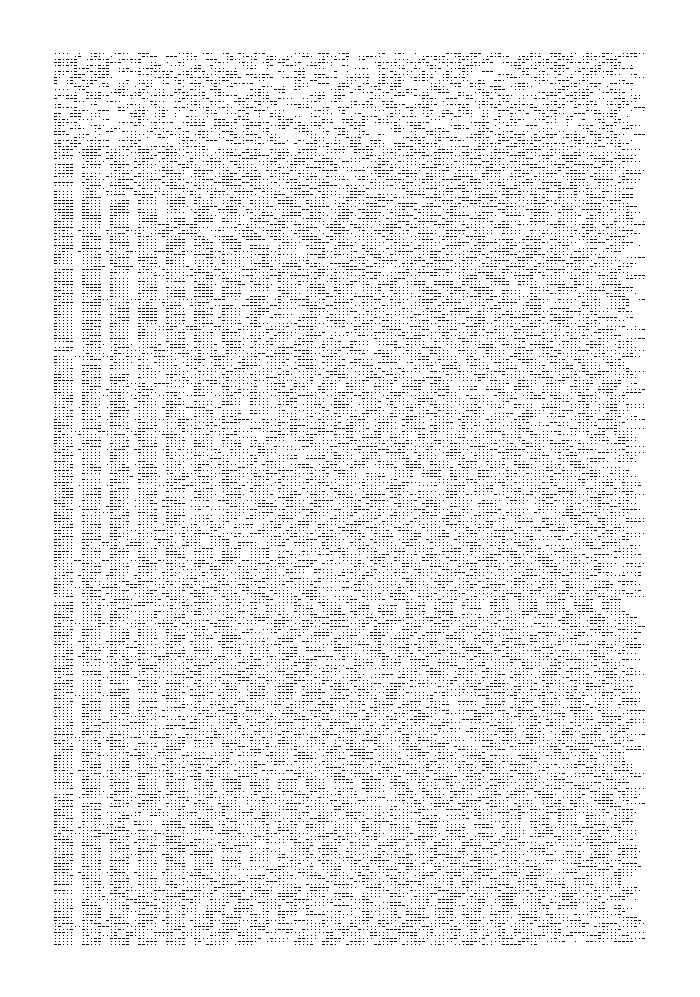

In [1]:
#La imagen
from IPython.display import Image
Image(filename='imagenes/desafioprogramador.png') 

<h2>Morse a Texto</h2>

Usé identify para ver las propiedades de la imagen (si es RGB, ancho*alto, etc). Seguro Mac tiene algo de esto para hacerlo pero fiaca.

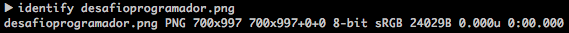

In [2]:
Image(filename='imagenes/screen_identify.png') 

Probé levantar la imagen como chars/unsigned chars en C++, pero me encontré con varios problemas (detecté muchos pixeles distintos que claramente no los hay y todos agrupados al principio).
<br> Así que busqué formas de hacerlo con Python3 y esto fue lo que quedó.

In [4]:
from PIL import Image

blanco=(255,255,255)
negro=(0,0,0)

punto = [blanco,negro,blanco]
barra = [negro,negro,negro]
fin_letra = [blanco,blanco,blanco]

morseAlphabet ={
        "A" : ".-",
        "B" : "-...",
        "C" : "-.-.",
        "D" : "-..",
        "E" : ".",
        "F" : "..-.",
        "G" : "--.",
        "H" : "....",
        "I" : "..",
        "J" : ".---",
        "K" : "-.-",
        "L" : ".-..",
        "M" : "--",
        "N" : "-.",
        "O" : "---",
        "P" : ".--.",
        "Q" : "--.-",
        "R" : ".-.",
        "S" : "...",
        "T" : "-",
        "U" : "..-",
        "V" : "...-",
        "W" : ".--",
        "X" : "-..-",
        "Y" : "-.--",
        "Z" : "--..",
        " " : "/",
        "?" : "..--..",
        "*" : ".-.-.-",
        "," : "--..--",
        "0" : "-----",
        "1" : ".----",
		"2" : "..---",
		"3" : "...--",
		"4" : "....-",
		"5" : ".....",
		"6" : "-....",
		"7" : "--...",
		"8" : "---..",
		"9" : "----."
}
inverseMorseAlphabet = dict((v,k) for (k,v) in morseAlphabet.items())

im = Image.open("imagenes/desafioprogramador.png") #Can be many different formats.
pix = im.load()
width, heigth = im.size
tipos_de_pixels = []

def indice_mas_a_la_izquierda(anImage):
	primera_linea = heigth
	ultima_linea = 0
	mas_a_la_izquierda = width
	mas_a_la_derecha = 0

	vi_la_primer_linea = False
	for j in range(0,heigth):
		vi_al_primer_punto_negro = False
		encontre_algo = False

		for i in range(0,width):
			if negro == pix[i,j]:

				mas_a_la_izquierda = min(i, mas_a_la_izquierda)

				primera_linea = min( j, primera_linea)

				mas_a_la_derecha = max( mas_a_la_derecha, i)

				ultima_linea = j

	return primera_linea, ultima_linea, mas_a_la_izquierda, mas_a_la_derecha


i_arriba,i_abajo,i_izq,i_der = indice_mas_a_la_izquierda(im)

contador_entero=0
for fila in range(0,heigth):
	for columna in range(0,width):
		if negro == pix[columna,fila]:
			contador_entero+=1

contador_recortado=0
texto = ""

letra_en_progreso = ""
espacios = 0
for fila in range(i_arriba,i_abajo+1,3):
	columna = i_izq

	if letra_en_progreso != "":
		texto += (inverseMorseAlphabet[letra_en_progreso])
		letra_en_progreso = ""
	
	espacios=0

	while columna < i_der+1:

		if punto == [pix[columna,fila],pix[columna+1,fila],pix[columna+2,fila]]:
			letra_en_progreso += "."
			contador_recortado +=1
			espacios=0

		if barra == [pix[columna,fila],pix[columna+1,fila],pix[columna+2,fila]]:
			letra_en_progreso += "-"
			contador_recortado += 3
			espacios=0

		if fin_letra == [pix[columna,fila],pix[columna+1,fila],pix[columna+2,fila]]:
			espacios +=1

			if 1 < espacios and letra_en_progreso != "":
				texto += (inverseMorseAlphabet[letra_en_progreso])
				letra_en_progreso = ""
			if 2 < espacios and espacios < 4:
				texto += " "

		columna +=4

In [5]:
#Si Recorri la misma cantidad de pixeles negros en la imagen esto deberia ser igual 
print (contador_recortado)
print (contador_entero)

50092
50092


Y nuestro texto termina siendo...

In [6]:
print(texto)

HELLO FRANK HOW ARE YOU DOING? ARE YOU ALRIGHT? ********** HOLA, ACA HABLA CACHO , QUIEN LLAMA? ******** ** WHAT HAPPEN THERE? WHO ARE  YOU? WHERE IS FRANK? **** ****** NO TE ENITENDO NADA, SOY CACHO, NO HABLAS CASTELLANO? ********** PLEASE STAY THERE, I AM SEARCHING FOR A TRANSLATOR* HOLA, SOY PEDRO,  QUIEN ESTA DEL OTRO LADO? QUE HA PASADO CON FRANK? NOS PUEDE  EXPLICAR LA SITUACION? *** ******* YO SOY CACHO, ESTOY EN LA CABINA DE COMUNICACION DEL BARCO, FRANK SE FUE ARRIBA A LA FIESTA? ********* * DISCULPE CACHO, REALMENTE NO COMPRENDEMOS LA SITUACION, CREEMOS QUE USTED ESTA DESORIENTADO, NOS PUEDE DECIR EXACTAMENTE LA FE CHA DE HOY Y DONDE SE ENCUENTRA * ********** 14 DE AB RIL DE 1912, Y NO PUEDO EXPLICAR LA SITUACION PORQUE ES ALG O EMBARAZOSA PARA MI, QUISIERA QUE HABLEMOS SEGUN EL PROTOCOLO DE SEGURIDAD HEX ******* *** COMPRENDIDO CACHO, PASE MOS A ESE PROTOCOLO* ***** ***** 436163686F3A 20486F6C61204672616E 6B2C206372656F20717565 2064652065 73746120666F726D6120736572C3A120  6D

<h2>Hex a Texto</h2>

<br>Buscando la forma de hacerlo en Python 3 encontré esta página: http://www.online-toolz.com/tools/text-hex-convertor.php

<br> El texto resultante fue el siguiente:

Probé con muchas funciones de hash hasta que di con Base64. Usé otra vez el mismo sitio de antes http://online-toolz.com/tools/text-base64-convertor.php.

El problema es parecido a 01 subset sum y los "tipos de cambio", con la salvedad que tenemos que asegurarnos no considerar los cambios donde se usó exactamente una moneda.
La primera solución la hice en C++ porque costumbre. Separé la criba de la dinámica para testear más rápido.

<h4>Para sacar los primos (Criba)</h4>

<h4>Ahora la dinámica</h4>

Como tuve un problema de overflow, tuve que usar <b>__int128</b>, pero después tuve problemas al querer printearlos con el operador "<<". Así que la pasé a python 3 que no tiene "problemas" con el tamaño para representar los enteros (a menos que uses nunmpy). La entrada es la lista de primos generados anteriormente por stdin.

El output fue el siguiente: <b> 540992328500517893750391624101174224 </b>

Y ahora usé este script para jugar con las conversiones de a 2 números a Hex y el Xor contra la otra cadena.

In [7]:

X = 540992328500517893750391624101174224
otraCadena = "673dbc07b736642ba64d2da5557056377674"

X_en_str = str(X)
X_en_lista = ["0x"+X_en_str[i*2]+X_en_str[i*2+1] for i in range(18)]

otraCadena_en_str = str(otraCadena)
otraCadena_en_lista = ["0x"+otraCadena_en_str[i*2]+otraCadena_en_str[i*2+1] for i in range(18)]


resultado = [int(otraCadena_en_lista[i],16)^int(X_en_lista[i],16) for i in range(18)]
resultado_hex = [hex(int(otraCadena_en_lista[i],16)^int(X_en_lista[i],16)) for i in range(18)]

#print(resultado)
#print(resultado_hex)

resultado_corrido=""
resultado_hex_corrido=""

for i in range(18):
	resultado_corrido+=str(resultado[i])
	resultado_hex_corrido += str(resultado_hex[i])[2:]

print("Resultado secuencia en int {}".format(resultado_corrido))
print("Resultado secuencia en hex {}".format(str(resultado_hex_corrido)))

print("Y ahora a String esto es: ")

print ([bytes.fromhex(resultado_hex[i][2:]).decode('utf-8') for i in range(18)])
print (bytes.fromhex(resultado_hex_corrido))

Resultado secuencia en int 515246535054538353564652554987325280
Resultado secuencia en hex 33342e353236355335382e34373157203450
Y ahora a String esto es: 
['3', '4', '.', '5', '2', '6', '5', 'S', '5', '8', '.', '4', '7', '1', 'W', ' ', '4', 'P']
b'34.5265S58.471W 4P'


Que después de un rato vi la S y me di cuenta que es: <b>34.5265S 58.471W 4P</b>

Que corresponde con la sede de Güemes 4 piso.
https://www.google.com.ar/maps/place/34%C2%B031'35.4%22S+58%C2%B028'15.6%22W/@-34.5265,-58.471,17z/data=!3m1!4b1!4m5!3m4!1s0x0:0x0!8m2!3d-34.5265!4d-58.471